In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# モデル作成のモジュール（最小二乗法を搭載）
from sklearn.linear_model import LinearRegression

# データ読み込み
from sklearn.datasets import load_boston

# 学習データとテストデータの分割をするモジュール
from sklearn.model_selection import train_test_split

In [3]:
# Bostonデータセットを読み込む（データに様々なメソッドを適用できるようインスタンスを作成）
boston = load_boston()

# 目的変数と説明変数に分ける
X, y = boston.data, boston.target

# 学習データとテストデータに分割する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# 線形回帰の適用関数を作成（インスタンス）
# .shapeで形状を出すのと同様に、lr.fitで回帰分析を実行する
lr = LinearRegression()

# モデルの作成を行う（最小二乗法により、微分して各重みを求め、直線の式を作成する）
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [4]:
# 切片（重みwo）を求める
lr.intercept_

36.61919534858056

In [5]:
# 回帰係数（傾き：w1～w13）を求める
print(lr.coef_)

[-1.30942592e-01  3.93397530e-02  3.34152241e-02  2.69312969e+00
 -1.77337676e+01  3.95093181e+00 -1.16396424e-03 -1.51204896e+00
  3.36066399e-01 -1.37052283e-02 -9.54346277e-01  8.23484120e-03
 -5.17616471e-01]


In [6]:
# 学習データに対する予測値を出す（モデル作成にした学習データも、実際にx_trainを代入して、どの程度y_trainに近づくかを見れる）
y_train_pred = lr.predict(X_train)

# テストデータに対する予測値を出す
y_test_pred = lr.predict(X_test)

In [7]:
y_train_pred[:10]

array([34.90259011, 26.4077059 , 24.8609863 , 23.55723929, 25.38074744,
       21.30054026, 15.08812309, 18.23233851, 41.39215876, 19.27343331])

In [8]:
y_test_pred[:10]

array([20.03167238, 29.27768731, 38.28364178, 23.48957053, 20.61602903,
       21.82028757, 17.52932565, 28.03671267, 19.50469772, 37.18758562])

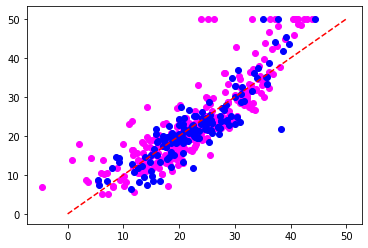

In [18]:
# 予測値と正解値をプロットしてみる（正解値 y = 予測値 x の直線を引いてみる）

fig, ax = plt.subplots()

ax.scatter(y_train_pred, y_train, color = 'magenta')
ax.scatter(y_test_pred, y_test, color = 'blue')
ax.plot((0, 50), (0, 50), linestyle = 'dashed', color = 'red')

plt.show()

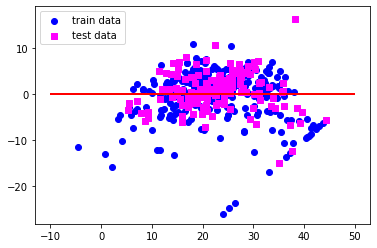

In [10]:
# 作成したモデルの性能を見るために、残差をプロットする（評価の前に、まずは残差を見る）
fig, ax = plt.subplots()

# 残差をプロットする
ax.scatter(y_train_pred, y_train_pred - y_train, color = 'Blue', marker = 'o', label = 'train data')
ax.scatter(y_test_pred, y_test_pred - y_test, c = 'Magenta', marker = 's', label = 'test data') # cと略してもいける

# y = 0 の直線をプロットする
ax.hlines(y = 0, xmin = -10, xmax = 50, linewidth = 2, color = 'red')
 
# 軸ラベルを設定する
ax.set_xlabel = ('Predict Values')
ax.set_ylabel = ('Residuals')

# 凡例の設定
ax.legend(loc = 'best')

# プロットを出力する
plt.show()

# 下記だと残差を中心に、上下の割合がバランスよく散らばっているので問題なし（赤線より上のみや、下のみの点が多いと問題あり）
# ただし、右下に直線的な関係がみられるため、もしかしたら正則化をした方が良いかもしれない

In [11]:
# 平均二乗誤差（MSE）を使用するメソッドの呼び出し
from sklearn.metrics import mean_squared_error

# 平均二乗誤差を求める（少数点第3桁まで出す）
print('MSE train : %.3f' % (mean_squared_error(y_train, y_train_pred)))
print('MSE test : %.3f' % (mean_squared_error(y_test, y_test_pred)))

# 決定係数を求める
print('R^2 train : %.3f' % (lr.score(X_train, y_train)))
print('R^2 test : %.3f' % (lr.score(X_test, y_test)))

MSE train : 24.391
MSE test : 16.491
R^2 train : 0.729
R^2 test : 0.767


### 参考文献

http://tekenuko.hatenablog.com/entry/2016/09/19/151547<br>
https://qiita.com/0NE_shoT_/items/08376b08783cd554b02e